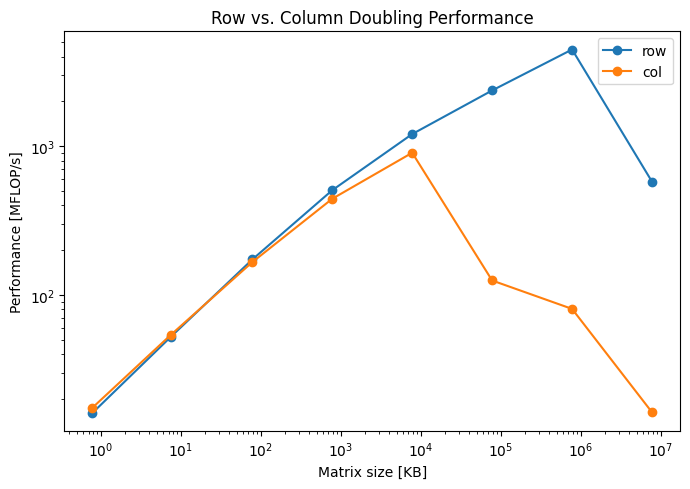

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Logarithmically spaced sizes from 10^1 up to 10^4.5
sizes = np.logspace(1, 4.5, num=8, dtype=int)

row_perfs = []
col_perfs = []
mat_kb = []

# We'll do a small number of repetitions to get a stable timing for each SIZE
repetitions = 100

for n in sizes:
    mat = np.random.rand(n, n)
    
    # Time row operation
    start_row = time.perf_counter()
    for _ in range(repetitions):
        # Touch n elements
        row_result = 2.0 * mat[0, :]
    end_row = time.perf_counter()
    row_time = end_row - start_row
    
    # Time column operation
    start_col = time.perf_counter()
    for _ in range(repetitions):
        # Touch n elements
        col_result = 2.0 * mat[:, 0]
    end_col = time.perf_counter()
    col_time = end_col - start_col
    
    # Each repetition processes n floats with one multiply per element
    # -> n floating ops per repetition -> total_ops = n * repetitions
    total_ops = n * repetitions
    
    # MFLOP/s = (ops / time) / 1e6
    row_perf = (total_ops / row_time) / 1e6
    col_perf = (total_ops / col_time) / 1e6
    
    row_perfs.append(row_perf)
    col_perfs.append(col_perf)
    
    # Matrix size in KB = n*n doubles * 8 bytes / 1024
    mat_kb.append((n*n*8) / 1024.0)

plt.figure(figsize=(7,5))
plt.loglog(mat_kb, row_perfs, 'o-', label="row")
plt.loglog(mat_kb, col_perfs, 'o-', label="col")
plt.xlabel("Matrix size [KB]")
plt.ylabel("Performance [MFLOP/s]")
plt.title("Row vs. Column Doubling Performance")
plt.legend()
plt.tight_layout()
plt.savefig("cache_scaling.png")
plt.show()
